In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



<h1>2. Data Collection</h1>

In [5]:
df=pd.read_csv('datasets/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<h3>Import Data Overview Library</h3>

In [6]:
def detect_data_types(df):
    """
    Detect whether the data type for each column in the DataFrame is discrete, continuous, or unknown.

    Parameters:
        df (pd.DataFrame): DataFrame containing the columns to analyze.

    Returns:
        dict: A dictionary where keys are column names and values are the data types ('discrete', 'continuous', 'unknown').
    """
    discrete_text_container=[]
    discrete_numeric_container=[]
    continuous_container=[]
    unknown_container=[]
    
    

    for column in df.columns:
        # Drop NaN values for analysis
        col_data = df[column].dropna()
        
        # Get unique value counts
        unique_values = col_data.nunique()

        # Check if the column is numerical (int or float)
        if col_data.dtype in ['int64', 'float64']:
            # For integer-based data with few unique values, it's likely discrete
            if col_data.dtype == 'int64' and unique_values / len(col_data) < 0.05:
                discrete_numeric_container.append(column)
            else:
                continuous_container.append(column)
                
        
        # Check if the column is categorical/text data
        elif col_data.dtype == 'object' or col_data.dtype.name == 'category':
            discrete_text_container.append(column)
        
        # If there are very few unique values compared to the length, treat it as discrete
        elif unique_values / len(col_data) < 0.05:
            discrete_text_container.append(column)
        
        # If the data doesn't fit into any category, mark it as 'unknown'
        else:
            unknown_container.append(column)
    
    return [discrete_text_container,discrete_numeric_container,continuous_container,unknown_container]
            



def dataset_analysis(df,target_column=None):


    # Total rows
    total_rows = len(df)
    # Count of unique rows
    unique_rows = len(df.drop_duplicates())
    # Count of duplicate rows
    duplicate_rows = total_rows - unique_rows
    # Calculate percentages
    unique_percentage = (unique_rows / total_rows) * 100
    duplicate_percentage = (duplicate_rows / total_rows) * 100

    print('='*50)
    print('Dataset Shape (Rows & Columns)')
    print('='*50)
    print('Rows :-',df.shape[0])
    print('Columns :-',df.shape[1])
    print(f"Unique Rows: {unique_rows} ({unique_percentage:.2f}%)")
    print(f"Duplicate Rows: {duplicate_rows} ({duplicate_percentage:.2f}%)")


    # Check for null (missing) values and their counts
    print("\n" + "="*50)
    print("Columns with Null Values and Null Value Counts")
    print("="*50)
    null_columns = df.columns[df.isnull().any()]
    if null_columns.empty:
        print("No columns contain null values.")
    else:
        for col in null_columns:
            null_count = df[col].isnull().sum()
            print(f"{col}: {null_count} null values")


    # Data type-wise column count
    print("\n" + "="*50)
    print("Data Type Wise Column Count")
    print("="*50)
    dtype_count = df.dtypes.value_counts()
    print(dtype_count)
    


    # Discrete And Continous Data Analysis
    print("\n" + "="*50)
    print("Discrete And Continous Data Analysis")
    print("="*50)
    dtype_count = df.columns
    dectectDataTypeObj=detect_data_types(df)

     # Extract containers
    discrete_text_columns, discrete_numeric_columns, continuous_columns, unknown_columns = dectectDataTypeObj

    #[discrete_text_container,discrete_numeric_container,continuous_container,unknown_container]
    
    if(len(dectectDataTypeObj)>0):

        #Discrete Text Columns
        if len(dectectDataTypeObj[0])>0:
            print('Discrete Text Columns :',', '.join(discrete_text_columns))
        else:
            print('Discrete Text Columns :','-----')

        print('\n')

        #Discrete Numeric Columns
        if len(dectectDataTypeObj[1])>0:
            print('Discrete Numeric Columns :',', '.join(discrete_numeric_columns) )
        else:
            print('Discrete Numeric Columns :','-----')
        print('\n')

        #Continuous  Columns
        if len(dectectDataTypeObj[2])>0:
            print('Continuous Columns :',', '.join(continuous_columns))
        else:
            print('Continuous Columns :','-----')

        print('\n')
        
        #Unknown Columns
        if len(dectectDataTypeObj[3])>0:
            print('Unknown Columns :',', '.join(unknown_columns))
        else:
            print('Unknown Columns :','-----')

        

    if len(continuous_columns) > 0:
        

        # Check skewness in numerical columns
        print("\n" + "="*50)
        print("Skewness of Numerical Columns")
        print("="*50)
        skewness = df[continuous_columns].skew()
        
        if skewness.empty:
            print("No numerical columns to check skewness.")
        else:
            for col in skewness.index:
                skew_value = skewness[col]
                
                # Determine the skewness range and flag
                if skew_value > 1:
                    skew_range = "Strong Positive Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value >= 0.5:
                    skew_range = "Mild Positive Skew"
                    #flag = "Potential for mild skewness issues"
                    flag=""
                elif skew_value >= -0.5 and skew_value <= 0.5:
                    skew_range = "Approximately Symmetric"
                    #flag = "No transformation needed"
                    flag=""
                elif skew_value <= -1:
                    skew_range = "Strong Negative Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value <= -0.5:
                    skew_range = "Mild Negative Skew"
                    #flag = "Potential for mild skewness issues"
                    flag=""
                
                print(f"{col}: {skew_value:.2f} -> {skew_range}. {flag}")

        
        
        
            
    else:
        print("No numeric columns available for Skewness Analysis.")


    # Additional information aboutConstant unique values and example entries
    print("\n" + "="*50)
    print("Constant Unique Values in Categorical Columns")
    print("="*50)
    categorical_cols=discrete_text_columns+discrete_numeric_columns
    if len(categorical_cols)>0:
        for col in categorical_cols:
            if len(df[col].unique()) == 1:
                print(f"{col}: {df[col].unique()}\n")
    

    # Additional information about unique values and example entries
    print("\n" + "="*50)
    print("Unique Values in Categorical Columns")
    print("="*50)
    categorical_cols=discrete_text_columns+discrete_numeric_columns
    if len(categorical_cols)>0:
        for col in categorical_cols:
            if len(df[col].unique()) != 1:
                print(f"{col}: {df[col].unique()}\n")
    
    

    # Check for Imbalance in Custom Target Column
    if df['price'].dtype=='object':
        print(f"\n{'='*50}\nImbalance Analysis for '{target_column}'\n{'='*50}")
        target_counts = df[target_column].value_counts()
        target_percentage = target_counts / len(df) * 100
    
    
        # Check for Imbalance
        imbalance_ratio = target_counts.min() / target_counts.max()
        print(f"The dataset is {'imbalanced' if imbalance_ratio < 0.25 else 'balanced'} with respect to '{target_column}'.")


<h3>Data Overview</h3>

In [7]:
dataset_analysis(df,target_column='price')

Dataset Shape (Rows & Columns)
Rows :- 13320
Columns :- 9
Unique Rows: 12791 (96.03%)
Duplicate Rows: 529 (3.97%)

Columns with Null Values and Null Value Counts
location: 1 null values
size: 16 null values
society: 5502 null values
bath: 73 null values
balcony: 609 null values

Data Type Wise Column Count
object     6
float64    3
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : area_type, availability, location, size, society, total_sqft


Discrete Numeric Columns : -----


Continuous Columns : bath, balcony, price


Unknown Columns : -----

Skewness of Numerical Columns
bath: 4.23 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
balcony: 0.01 -> Approximately Symmetric. 
price: 8.06 -> Strong Positive Skew. Consider transformation (e.g., log or square root)

Constant Unique Values in Categorical Columns

Unique Values in Categorical Columns
area_type: ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area

<h1>3. Data Preprocessing & EDA</h1>

<h5>3.1 Handle missing values (e.g., imputation, removal).</h5>

<section>
    <h2>Dataset Overview</h2>
    <hr>
    <h3>Dataset Shape (Rows & Columns)</h3>
    <p><strong>Rows:</strong> 13,320</p>
    <p><strong>Columns:</strong> 9</p>
    <p><strong>Unique Rows:</strong> 12,791 (96.03%)</p>
    <p><strong>Duplicate Rows:</strong> 529 (3.97%)</p>
    <hr>
    <h3>Columns with Null Values and Null Value Counts</h3>
    <ul>
        <li><strong>Location:</strong> 1 null value</li>
        <li><strong>Size:</strong> 16 null values</li>
        <li><strong>Society:</strong> 5,502 null values</li>
        <li><strong>Bath:</strong> 73 null values</li>
        <li><strong>Balcony:</strong> 609 null values</li>
    </ul>
</section>

In [8]:
df=df.drop(columns=['society'],axis=1)

In [9]:
df=df.dropna(axis=0)

In [10]:
df.shape

(12710, 8)

<h5>3.2 Remove Duplicate Record.</h5>

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(12146, 8)

<h5>3.3 Detect and treat outliers.</h5>

In [13]:
df['availability']=df['availability'].map(lambda x: 'On Date' if '-' in x else x)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,On Date,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [14]:
df['availability'].value_counts()

availability
Ready To Move    9639
On Date          2507
Name: count, dtype: int64

In [15]:
# Step 1: Standardize "Bedroom" to "BHK"
df['size'] = df['size'].astype(str).str.replace('Bedroom', 'BHK')

# Step 2: Extract only numeric values
df['size'] = df['size'].str.extract('(\d+)')  # Extract numbers only

# Step 3: Convert to integer (Handling NaN values)
df['size'] = pd.to_numeric(df['size'], errors='coerce')

# Step 4: Fill missing values (Optional)
df['size'].fillna(df['size'].median(), inplace=True)

In [16]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,On Date,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


In [17]:
df['size'].value_counts().sort_index()

size
1      630
2     5170
3     4443
4     1221
5      293
6      192
7       84
8       68
9       34
10       3
11       3
12       1
13       1
14       1
27       1
43       1
Name: count, dtype: int64

In [18]:
df=df[df['size']<10]

In [19]:
df.shape

(12135, 8)

In [20]:
print(df['total_sqft'].value_counts().index.to_numpy())

['1200' '1100' '1500' ... '1369' '1200 - 1470' '1557']


In [21]:
df['total_sqft'].value_counts().index

Index(['1200', '1100', '1500', '2400', '600', '1000', '1350', '1050', '1300',
       '1250',
       ...
       '16335', '886', '1648', '2872', '1331.95', '6688', '2920', '1369',
       '1200 - 1470', '1557'],
      dtype='object', name='total_sqft', length=1973)

In [22]:
import re
# Function to extract numbers
def extract_numbers(text):
    return ''.join(re.findall(r'\d+', text))

# Function to process sqft values
def getValues(i):
    if isinstance(i, str):  # Corrected type check
        if bool(re.search(r'[a-zA-Z]', i)):  # If contains alphabets, extract numbers
            return extract_numbers(i)
        elif '-' in i:  # Handle range values
            split_obj = i.split('-')
            return (float(split_obj[0].strip()) + float(split_obj[1].strip())) / 2
        else:  # Convert single numeric string to float
            return float(i)
    return i  # Return unchanged if not a string

In [23]:
df['total_sqft'] = df['total_sqft'].apply(getValues)


In [24]:
df['total_sqft'].astype('float')

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13312    1262.0
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
Name: total_sqft, Length: 12135, dtype: float64

<Axes: xlabel='size', ylabel='total_sqft'>

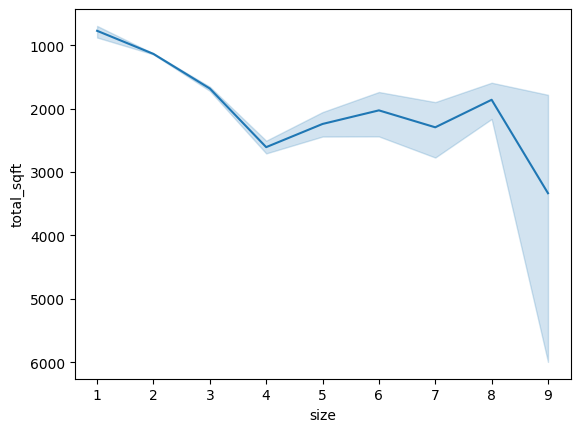

In [25]:
sns.lineplot(data=df,x='size',y='total_sqft')

In [26]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,On Date,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00


<Axes: xlabel='total_sqft', ylabel='price'>

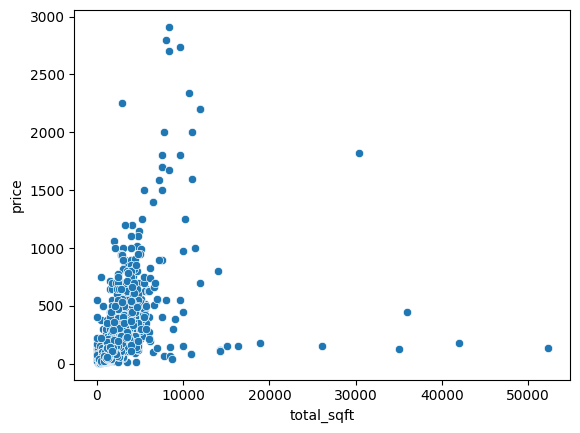

In [27]:
sns.scatterplot(data=df,y='price',x='total_sqft')

In [28]:
df['total_sqft']=df['total_sqft'].astype('float')

In [29]:
df['per_sqft']=df['total_sqft']/df['size']
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,per_sqft
0,Super built-up Area,On Date,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,528.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,650.0
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00,480.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,507.0
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00,600.0


<Axes: xlabel='per_sqft', ylabel='price'>

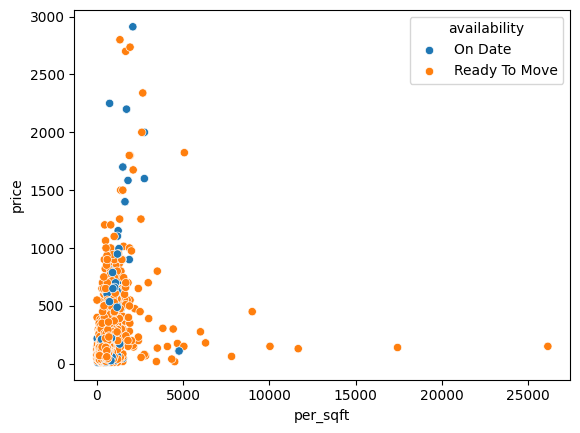

In [30]:
sns.scatterplot(data=df,y='price',x='per_sqft',hue='availability')

In [31]:
df=df[df['per_sqft']<5000]

<Axes: xlabel='per_sqft', ylabel='price'>

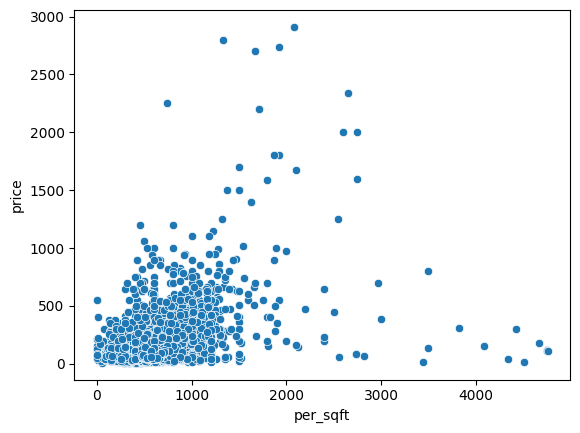

In [32]:
sns.scatterplot(data=df,y='price',x='per_sqft')

In [33]:
df.corr(numeric_only=True)

,size,total_sqft,bath,balcony,price,per_sqft
size,1.000000,0.433096,0.872680,0.208086,0.421269,-0.167614
total_sqft,0.433096,1.000000,0.494925,0.179046,0.646650,0.714901
bath,0.872680,0.494925,1.000000,0.224080,0.475972,-0.014505
balcony,0.208086,0.179046,0.224080,1.000000,0.119496,0.036573
price,0.421269,0.646650,0.475972,0.119496,1.000000,0.407062
per_sqft,-0.167614,0.714901,-0.014505,0.036573,0.407062,1.000000


In [34]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [35]:
df=df.drop(columns=['total_sqft'],axis=1)

In [36]:
df.head()

,area_type,availability,location,size,bath,balcony,price,per_sqft,price_per_sqft
0,Super built-up Area,On Date,Electronic City Phase II,2,2.0,1.0,39.07,528.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5.0,3.0,120.00,650.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,2.0,3.0,62.00,480.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3.0,1.0,95.00,507.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,2.0,1.0,51.00,600.0,4250.000000


In [37]:
np.set_printoptions(threshold=np.inf)  # Show entire array


# Convert value_counts() to DataFrame
df_location = df['location'].value_counts().reset_index()

# Rename columns
df_location.columns = ['Location', 'Count']

In [38]:
df_location.head()

,Location,Count
0,Whitefield,497
1,Sarjapur Road,352
2,Electronic City,284
3,Kanakpura Road,231
4,Thanisandra,226


In [39]:
df_location.shape

(1257, 2)

In [40]:
less_than_10_location_values_set=df_location[df_location['Count'] < 10]['Location'].values


In [41]:
def getLocation(i):
    if i in less_than_10_location_values_set:
        return "Other"
    else:
        return i
df['location']=df['location'].map(lambda x:getLocation(x))

In [42]:
df['location'].value_counts()

location
Other                    2657
Whitefield                497
Sarjapur  Road            352
Electronic City           284
Kanakpura Road            231
                         ... 
Doddakallasandra           10
Marsur                     10
1st Block Koramangala      10
Gunjur Palya               10
HAL 2nd Stage              10
Name: count, Length: 243, dtype: int64

In [43]:
df.head()

,area_type,availability,location,size,bath,balcony,price,per_sqft,price_per_sqft
0,Super built-up Area,On Date,Electronic City Phase II,2,2.0,1.0,39.07,528.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5.0,3.0,120.00,650.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,2.0,3.0,62.00,480.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3.0,1.0,95.00,507.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,2.0,1.0,51.00,600.0,4250.000000


<Axes: xlabel='size', ylabel='per_sqft'>

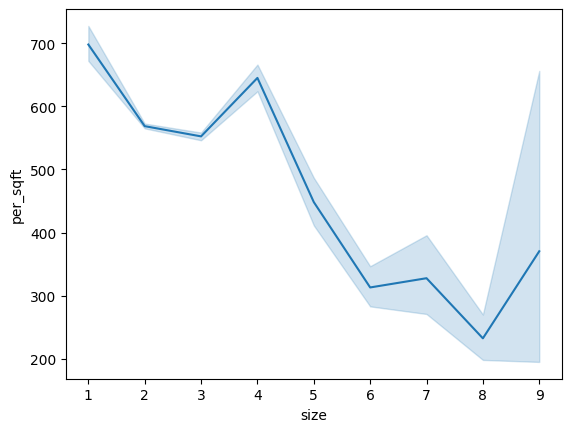

In [44]:
sns.lineplot(data=df,x='size',y='per_sqft')

In [45]:
#We generally consider an average of around 400 square feet per BHK when estimating the size of any unit
df=df[df['per_sqft']>400]

<Axes: xlabel='price'>

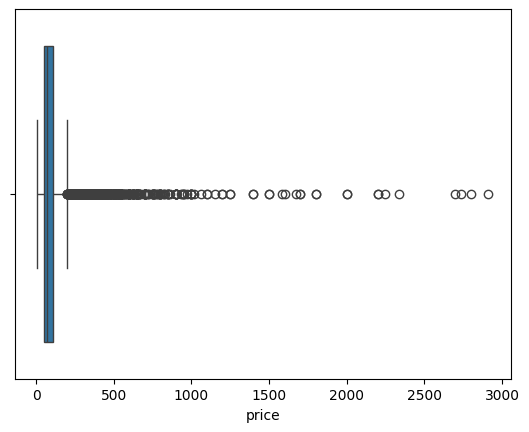

In [46]:
sns.boxplot(data=df,x='price')

In [47]:
#
df=df[df['price']<1000]

<Axes: xlabel='price_per_sqft'>

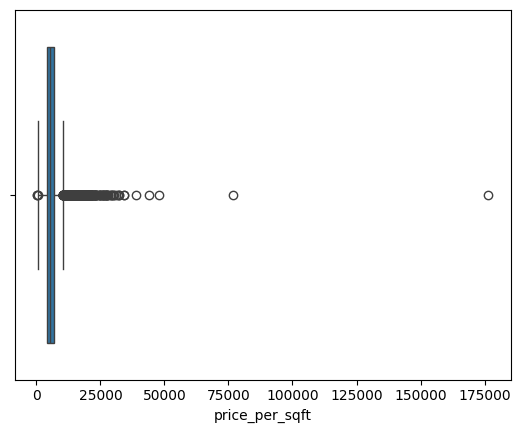

In [48]:
sns.boxplot(data=df,x='price_per_sqft')

In [49]:
df=df[df['price_per_sqft']<30000]

<Axes: xlabel='per_sqft', ylabel='price'>

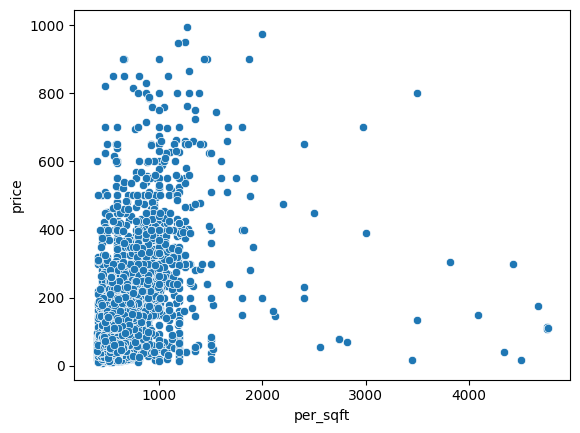

In [50]:
sns.scatterplot(data=df,y='price',x='per_sqft')

In [51]:
df_dummies = pd.get_dummies(df, columns=['area_type', 'availability', 'location'])


In [52]:
df_dummies.head()

,size,bath,balcony,price,per_sqft,price_per_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2,2.0,1.0,39.07,528.0,3699.810606,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,4,5.0,3.0,120.00,650.0,4615.384615,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,2.0,3.0,62.00,480.0,4305.555556,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,3.0,1.0,95.00,507.0,6245.890861,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2,2.0,1.0,51.00,600.0,4250.000000,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df_dummies = df_dummies.astype(float)


In [54]:
df_dummies.head()

,size,bath,balcony,price,per_sqft,price_per_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2.0,2.0,1.0,39.07,528.0,3699.810606,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,5.0,3.0,120.00,650.0,4615.384615,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2.0,3.0,62.00,480.0,4305.555556,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,1.0,95.00,507.0,6245.890861,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,51.00,600.0,4250.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df_dummies.to_csv('datasets/clean_datasets.csv', index=False)  # index=False prevents writing row numbers